# Гордионок М8О-209Б-19
## Задание:

Lvl1 и Lvl2. По предоставленным выборкам постройте гистограмму, по гистограммам поймите, что это за распределение. По следующим формулам посчитайте среднее выборочное (аналог мат. ожидания), и выборочную дисперсию (аналог дисперсии). 

$$ M = \frac{\sum_{i=1}^n X_i}{n} , D = \frac{\sum_{i=1}^n (X_i - M)^2}{n - 1} $$

По этим «математическому ожиданию» и «дисперсии» и иным соображениям постарайтесь восстановить параметры распределения.

Возможные распределения:

1) Равномерное. Параметры – a и b – начало и конец участка распределения.

2) Треугольное. Параметры - a и b – начало и конец участка распределения, c – максимум функции распределения.

3) Нормальное. Параметры m – среднее значение, $\sigma$ – среднеквадратическое отклонение. Дисперсия равна $ \sigma^2 $

4) Экспоненциальное. Параметр – $\lambda$.

# Lvl1

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sympy as sym
%matplotlib inline

In [2]:
A = scipy.io.loadmat('Level1_Data3.mat')
D = A['D']
N = len(D[0])

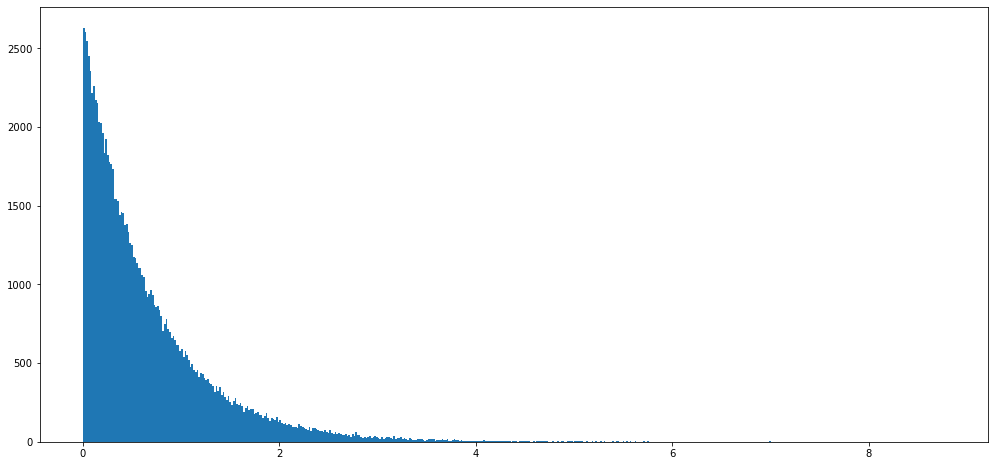

In [3]:
plt.figure(figsize=(17,8))
plt.hist(D[0], bins=500)

print()

In [4]:
M = np.sum(D) / N
Disp = np.sum((D - M)**2) / (N - 1)

print('Cреднее выборочное = ', M)
print('Выборочная дисперсия = ', Disp)

Cреднее выборочное =  0.6631366353967529
Выборочная дисперсия =  0.4468515833356742


Посмотрев на гистограмму, можно понять, что дано Экспоненциальное распределение. $ \Rightarrow $
$$ M[X] = \frac{1}{\lambda}, D[X] = \frac{1}{\lambda^2} $$


In [5]:
print('𝜆 =', 1 / M)
print('𝜆 =', np.sqrt(1/Disp))

𝜆 = 1.5079848505153128
𝜆 = 1.4959543792252368


## Выводы
### Экспоненциальное распределение, $ \lambda \approx 1.5 $

# Lvl2

In [6]:
A = scipy.io.loadmat('Level2_Data3.mat')
D = A['D']
N = len(D[0])

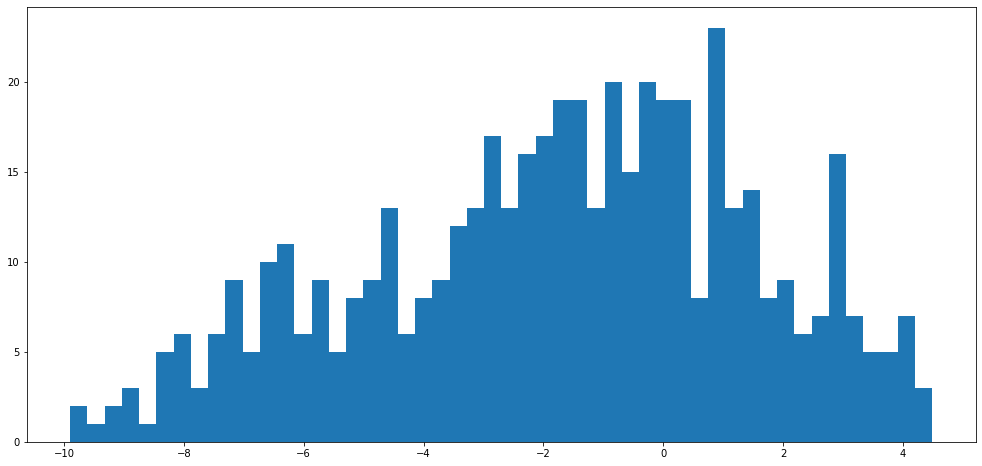

In [7]:
plt.figure(figsize=(17,8))
plt.hist(D[0], bins=50)

print()

In [8]:
M = np.sum(D) / N
Disp = np.sum((D - M)**2) / (N - 1)

print('Cреднее выборочное = ', M)
print('Выборочная дисперсия = ', Disp)

Cреднее выборочное =  -1.7636466600551512
Выборочная дисперсия =  10.482894915394114


Посмотрев на гистограмму, можно понять, что дано Нормальное распределение. $ \Rightarrow $
$$ M[X] = \mu, D[X] = \sigma^2 $$

In [9]:
print('𝜇 =', M)
print('𝜎^2 =', Disp)

𝜇 = -1.7636466600551512
𝜎^2 = 10.482894915394114


## Выводы
### Нормальное распределение, $ \mu \approx -1.76, \sigma^2 \approx 10.48 $

# Задание 2
LineMNK и QuadMNK. По представленным значениям X и Y постройте МНК-аппроксимацию в виде прямой и параболы, соответственно. Нарисуйте графики выборки и полученной аппроксимации. Предполагая, что ошибка распределена по нормальному закону, с матожиданием 0, найдите параметр σ.

## LineMNK

In [10]:
A = scipy.io.loadmat('LineMNK_Data3.mat')
X = np.array(A['X'])[0]
Y = A['Y'][0]

4999.999999999999 -1432.2275293383807 33350.01668335002 -1138.3458440734858
{K: 0.721290990307589, B: -5.03868248087633}
<class 'numpy.ndarray'> <class 'list'>


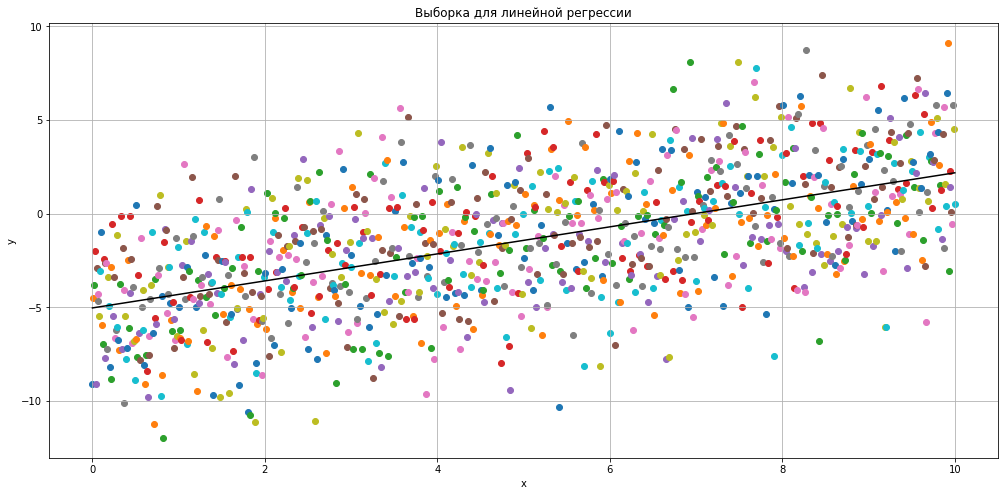

In [11]:
Dmin = np.min(X)
Dmax = np.max(X)
Sx = X.sum()
Sy = Y.sum()
X2 = X * X
XY = X * Y
SX2 = X2.sum()
SXY = XY.sum()

print(Sx, Sy, SX2, SXY)

K, B = sym.symbols('K, B')
f1 = sym.Eq(2*K*Sx + 2*B*len(X) - 2 * Sy, 0)  #! После загрузки данных тут подстава
f2 = sym.Eq(2*K*SX2 + 2*B*Sx - 2 * SXY, 0)
KB = sym.solve([f1, f2], [K, B])

print(KB)

YClear = [KB[K] * x + KB[B] for x in X]

print(type(X), type(YClear))

plt.figure(figsize=(17,8))         # косметика графика
for x, y in zip(X, Y):
    plt.scatter(x, y)

plt.plot(X, YClear, color='black')
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Выборка для линейной регрессии')
plt.grid()
plt.show()

## QuadMNK

In [12]:
A = scipy.io.loadmat('QuadMNK_Data3.mat')
X = np.array(A['X'])[0]
Y = A['Y'][0]

{a: -3.04608104007064, b: -4.81784240113040, c: -4.95445506360983}
<class 'numpy.ndarray'> <class 'list'>


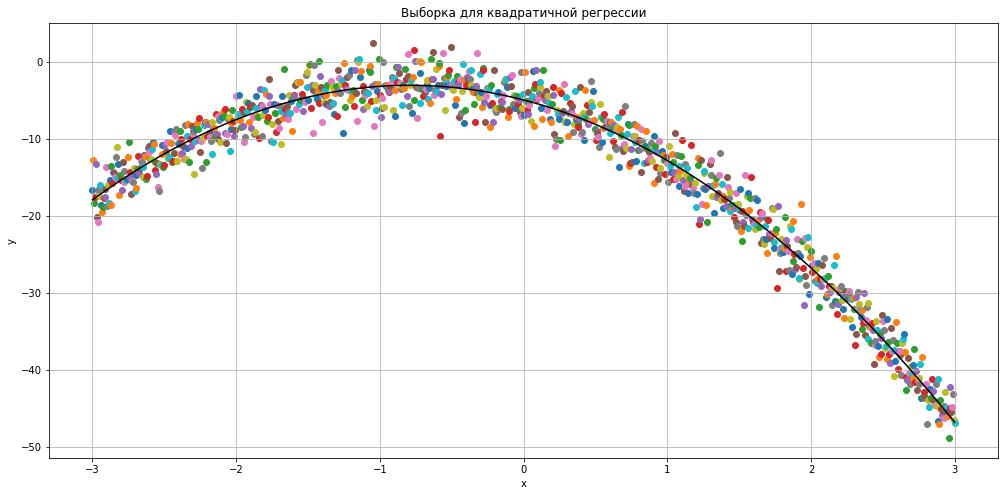

In [13]:
Dmin = np.min(X)
Dmax = np.max(X)
Sx = X.sum()
Sy = Y.sum()
X2 = X * X
X3 = X2 * X
X4 = X2 * X2
X2Y = X2 * Y
XY = X * Y
SX2 = X2.sum()
SXY = XY.sum()
SX2 = X2.sum()
SX3 = X3.sum()
SX4 = X4.sum()
SX2Y = X2Y.sum()

a, b, c = sym.symbols('a, b, c')
f1 = sym.Eq(a * SX4 + b * SX3 + c * SX2, SX2Y)
f2 = sym.Eq(a * SX3 + b * SX2 + c * Sx, SXY)
f3 = sym.Eq(a * SX2 + b * Sx + c * len(X), Sy)
abc = sym.solve([f1, f2, f3], [a, b, c])

print(abc)

YClear = [abc[a] * x * x + abc[b] * x + abc[c] for x in X]

print(type(X), type(YClear))

plt.figure(figsize=(17,8))         # косметика графика
for x,y in zip(X, Y):
    plt.scatter(x, y)

plt.plot(X, YClear, color='black')
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Выборка для квадратичной регрессии')
plt.grid()
plt.show()